<a href="https://colab.research.google.com/github/cxmedeiros/SistemasInteligentes/blob/master/projeto_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto MLP: Sistemas Inteligentes
##### Grupo: Kailane Felix (kefs), Gabriel Lopes (gls6), Camila Xavier (cxm), Lucas Souza (lsb4), Luisa Mendes (mlmsp), Lucas Mota (lmm3)

#### 🎯 Objetivos:

Neste projeto, usaremos um classificador MLP em um conjunto de dados sobre Lombalgia com o objetivo de reconhecer pessoas que possuem a doença através de dados físicos da sua coluna vertebral.

#### 🔁 Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 📚 Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from math import ceil

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 10

#### 🎲 Importando os dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projetos Sistemas Inteligentes/Dataset_spine.csv')

#### 👀 Dando uma olhada na estrutura geral dos dados

In [ ]:
df.head()

Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal   
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal   
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal   
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal   
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal   

                                         Unnamed: 13  
0                                                NaN  
1                                                NaN  
2  Prediction is done by using binary classificat...  
3                                                NaN  
4                                                NaN

In [ ]:
mask = df['Class_att'] == 'Abnormal'
abnormal_df = df[mask]
normal_df = df[~mask]

In [ ]:
abnormal_df.describe()

Col1        Col2        Col3        Col4        Col5        Col6  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean    64.692562   19.791111   55.925370   44.901450  115.077713   37.777705   
std     17.662129   10.515871   19.669471   14.515560   14.090605   40.696741   
min     26.147921   -6.554948   14.000000   13.366931   70.082575  -10.675871   
25%     50.102507   13.048130   41.116964   34.380345  107.309280    7.263227   
50%     65.274888   18.798899   56.150000   44.639597  115.650323   31.946516   
75%     77.593672   24.815515   68.102805   55.146868  123.133365   55.371614   
max    129.834041   49.431864  125.742385  121.429566  163.071041  418.543082   

             Col7        Col8        Col9       Col10       Col11       Col12  
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000  
mean     0.483979   21.085875   12.948913   12.132737  -13.826677   25.146915  
std      0.286319    8.550365    3.516762    2.848401   12.029824   10.242513  
min      0.003220    7.027000    7.037800    7.030600  -35.287375    7.007900  
25%      0.250212   13.054400   10.151175    9.801870  -23.732086   16.900900  
50%      0.501280   21.750600   12.770050   11.973735  -14.892070   24.509400  
75%      0.708476   28.194975   15.950475   14.609660   -2.937705   33.204375  
max      0.998827   36.743900   19.324000   16.821080    6.868423   44.233800

In [ ]:
normal_df.describe()

Col1        Col2        Col3        Col4        Col5        Col6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    51.685244   12.821414   43.542605   38.863830  123.890834    2.186572   
std     12.368161    6.778503   12.361388    9.624004    9.014246    6.307483   
min     30.741938   -5.845994   19.071075   17.386972  100.501192  -11.058179   
25%     42.817849    8.799951   35.000000   32.340487  118.182659   -1.511360   
50%     50.123115   13.482435   42.638923   37.059694  123.874328    1.152710   
75%     61.470097   16.785953   51.602346   44.608788  129.040401    4.968807   
max     89.834676   29.894119   90.563461   67.195460  147.894637   31.172767   

             Col7        Col8        Col9       Col10       Col11       Col12  
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000  
mean     0.449880   21.816394   13.307268   11.514534  -14.528712   26.694019  
std      0.284711    8.846484    3.142902    2.955985   12.675224   10.852099  
min      0.005045    7.390700    7.475200    7.054110  -35.077537    7.432400  
25%      0.201843   13.164225   11.053625    8.706198  -26.789617   17.838050  
50%      0.418732   22.414600   13.409750   11.330750  -13.974694   27.727950  
75%      0.695981   29.760625   15.568925   13.816777   -4.488790   35.660300  
max      0.997247   36.619400   19.265900   16.617540    6.972071   44.341200

##### **Dicionário de dados:**
- Col1: incidência pélvica
- Col2: inclinação pélvica
- Col3: ângulo lombar lordosis
- Col4: inclinação sacral
- Col5: raio pélvico
- Col6: grau espondilolistese
- Col7: inclinação pélvica
- Col8: Inclinação direta
- Col9: inclinação torácica
- Col10: inclinação cervical
- Col11: ângulo do sacro
- Col12: inclinação escoliose
- Class_att = anormal, normal

#### 🗂️ Definindo a matriz de atributos e o vetor target:

In [ ]:

X = df.drop(columns = ['Class_att', 'Unnamed: 13'])
y = df['Class_att']

#### ✂️ Separando nosso dataset em um set de treino e um set de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### 🏋️ Treinando...

In [ ]:
clf = MLPClassifier().fit(X_train, y_train)

#### 🤔 Analisando o Classification Report do modelo

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

    Abnormal       0.88      0.86      0.87        57
      Normal       0.64      0.67      0.65        21

    accuracy                           0.81        78
   macro avg       0.76      0.76      0.76        78
weighted avg       0.81      0.81      0.81        78



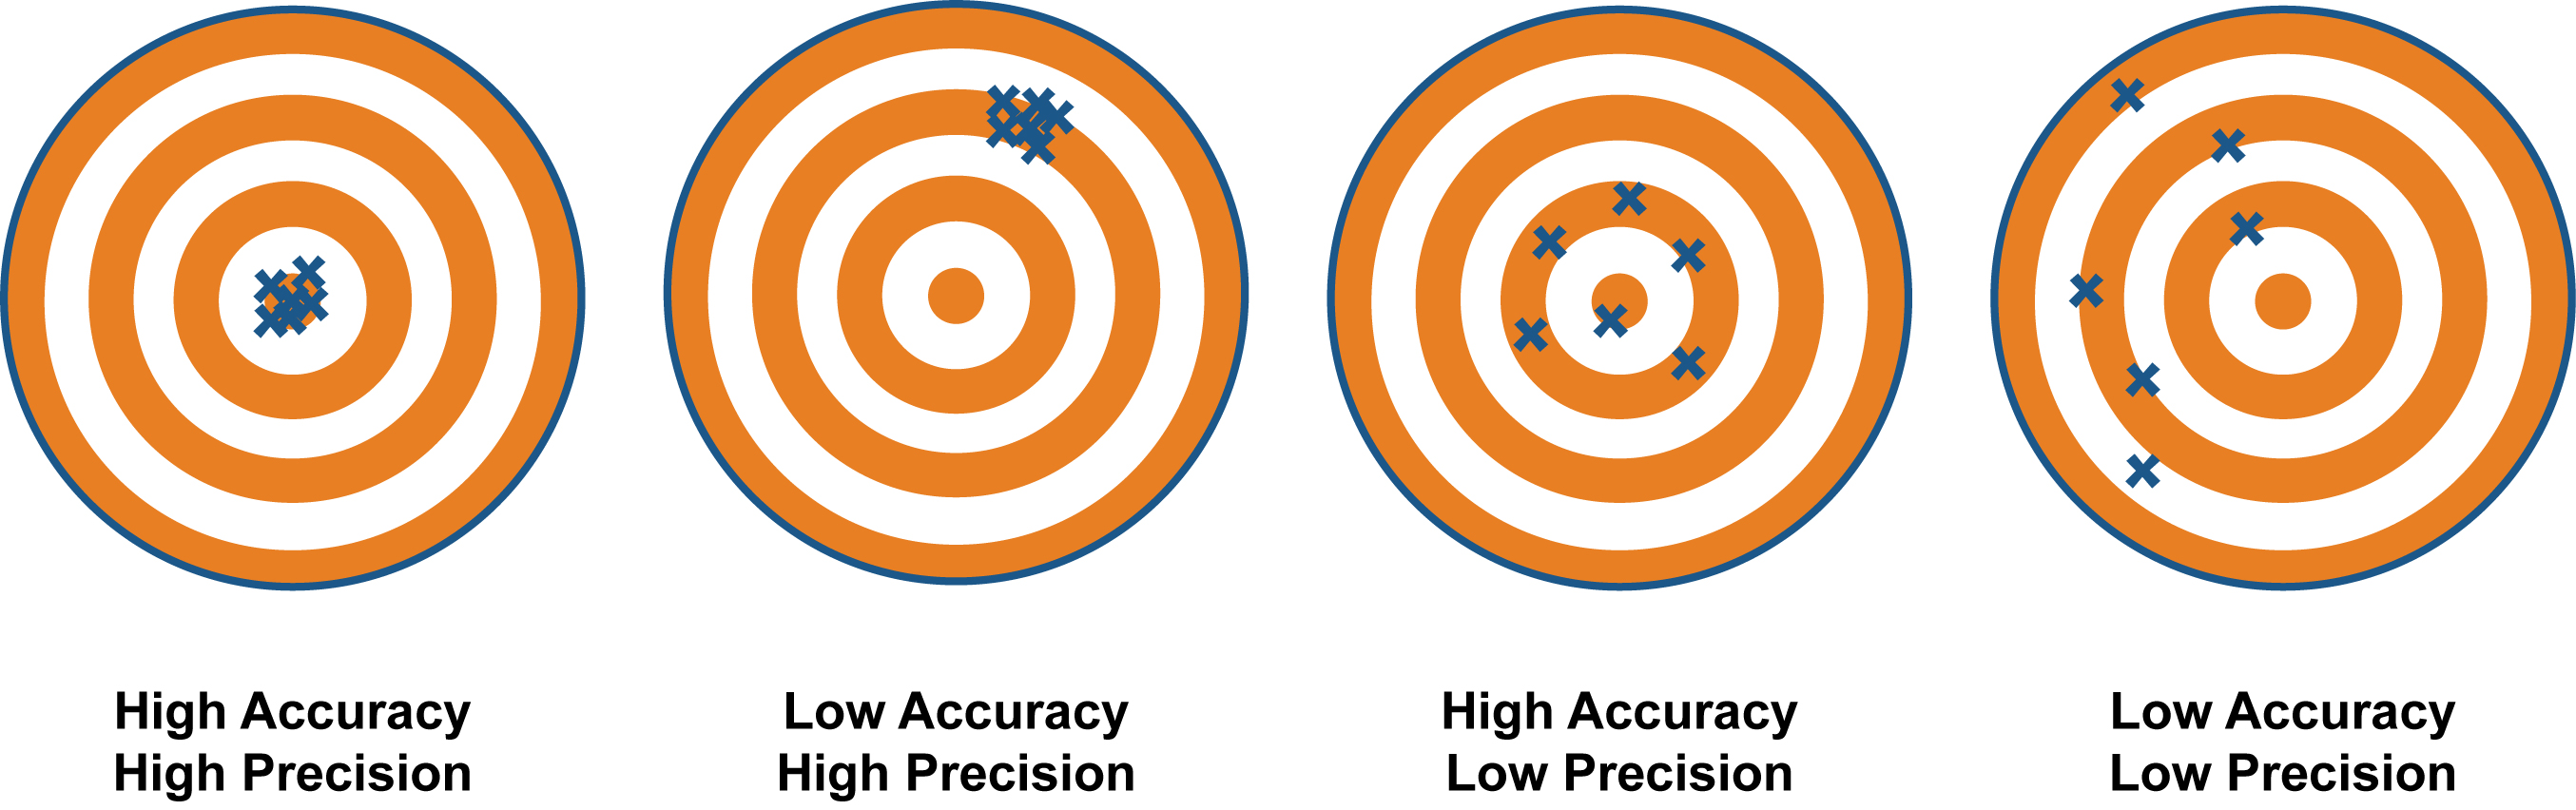

- A precisão mede quantas das previsões positivas do modelo são realmente corretas
- A acurácia é uma medida geral de avaliação que mede a proporção de previsões corretas
- O F1-Score é uma medida de avaliação que considera tanto a precisão quanto o recall.
- O recall mede a capacidade do modelo em detectar todos os exemplos positivos

#### 🤔 Analisando a matriz de confusão do modelo

In [ ]:
cf_matrix_nb = confusion_matrix(y_test, y_pred)
print(cf_matrix_nb)

[[49  8]
 [ 7 14]]


<Axes: >

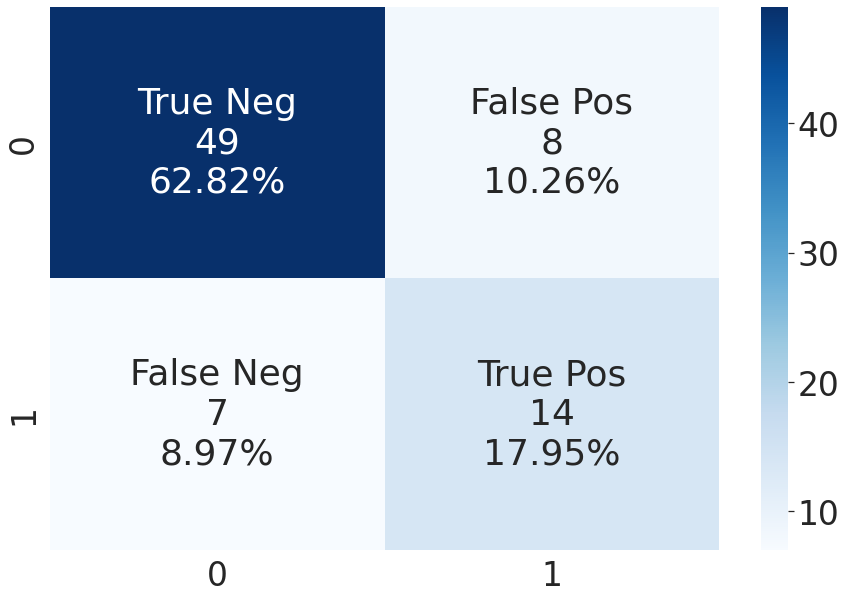

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_nb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_nb.flatten() / np.sum(cf_matrix_nb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 3)
sns.heatmap(cf_matrix_nb, annot=labels, fmt= '', cmap='Blues')

#### 📊 Análise exploratória

<Axes: >

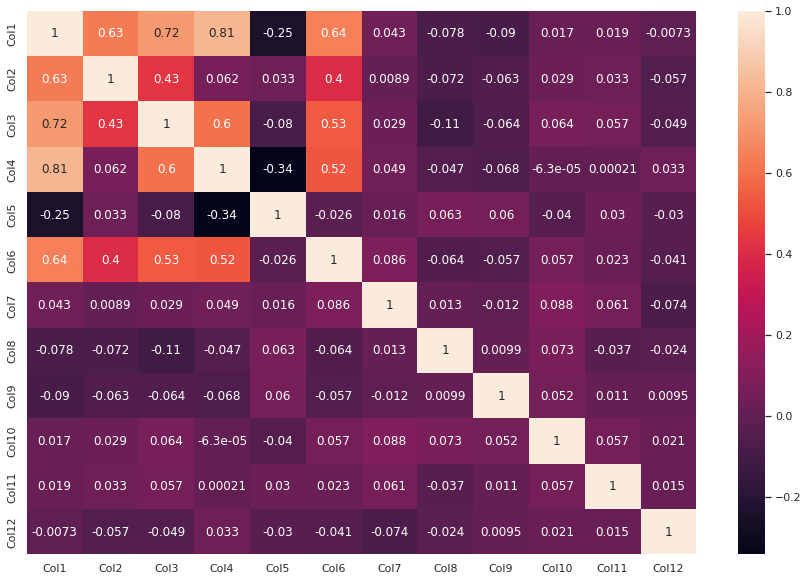

In [ ]:
sns.set(font_scale= 1)
sns.heatmap(data = df.corr(), annot=True)

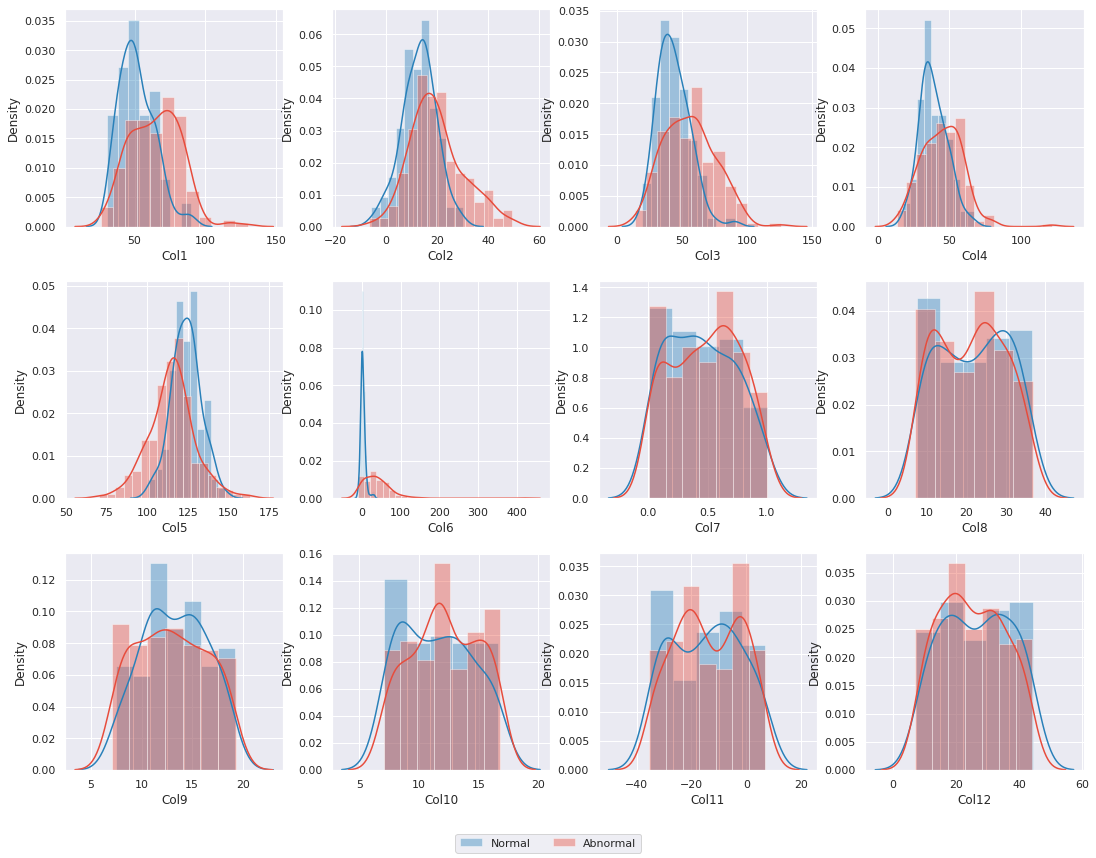

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

fg, ax = plt.subplots(ncols=4, nrows=3, sharex=False, sharey=False, figsize=(15,12))
fg.tight_layout()

plt.subplots_adjust(hspace=0.25, bottom = 0.1)

for index, axes in enumerate(ax.reshape(-1)):
    normal = sns.distplot(df[df.Class_att == 'Normal'].iloc[:, index], ax=axes, color='#2980b9', label = 'Normal')
    abnormal = sns.distplot(df[df.Class_att == 'Abnormal'].iloc[:, index],ax=axes, color='#e74c3c', label = 'Abnormal')
    
h, l = axes.get_legend_handles_labels()
fg.legend(h, l, loc='lower center', ncol = 2)
plt.show()

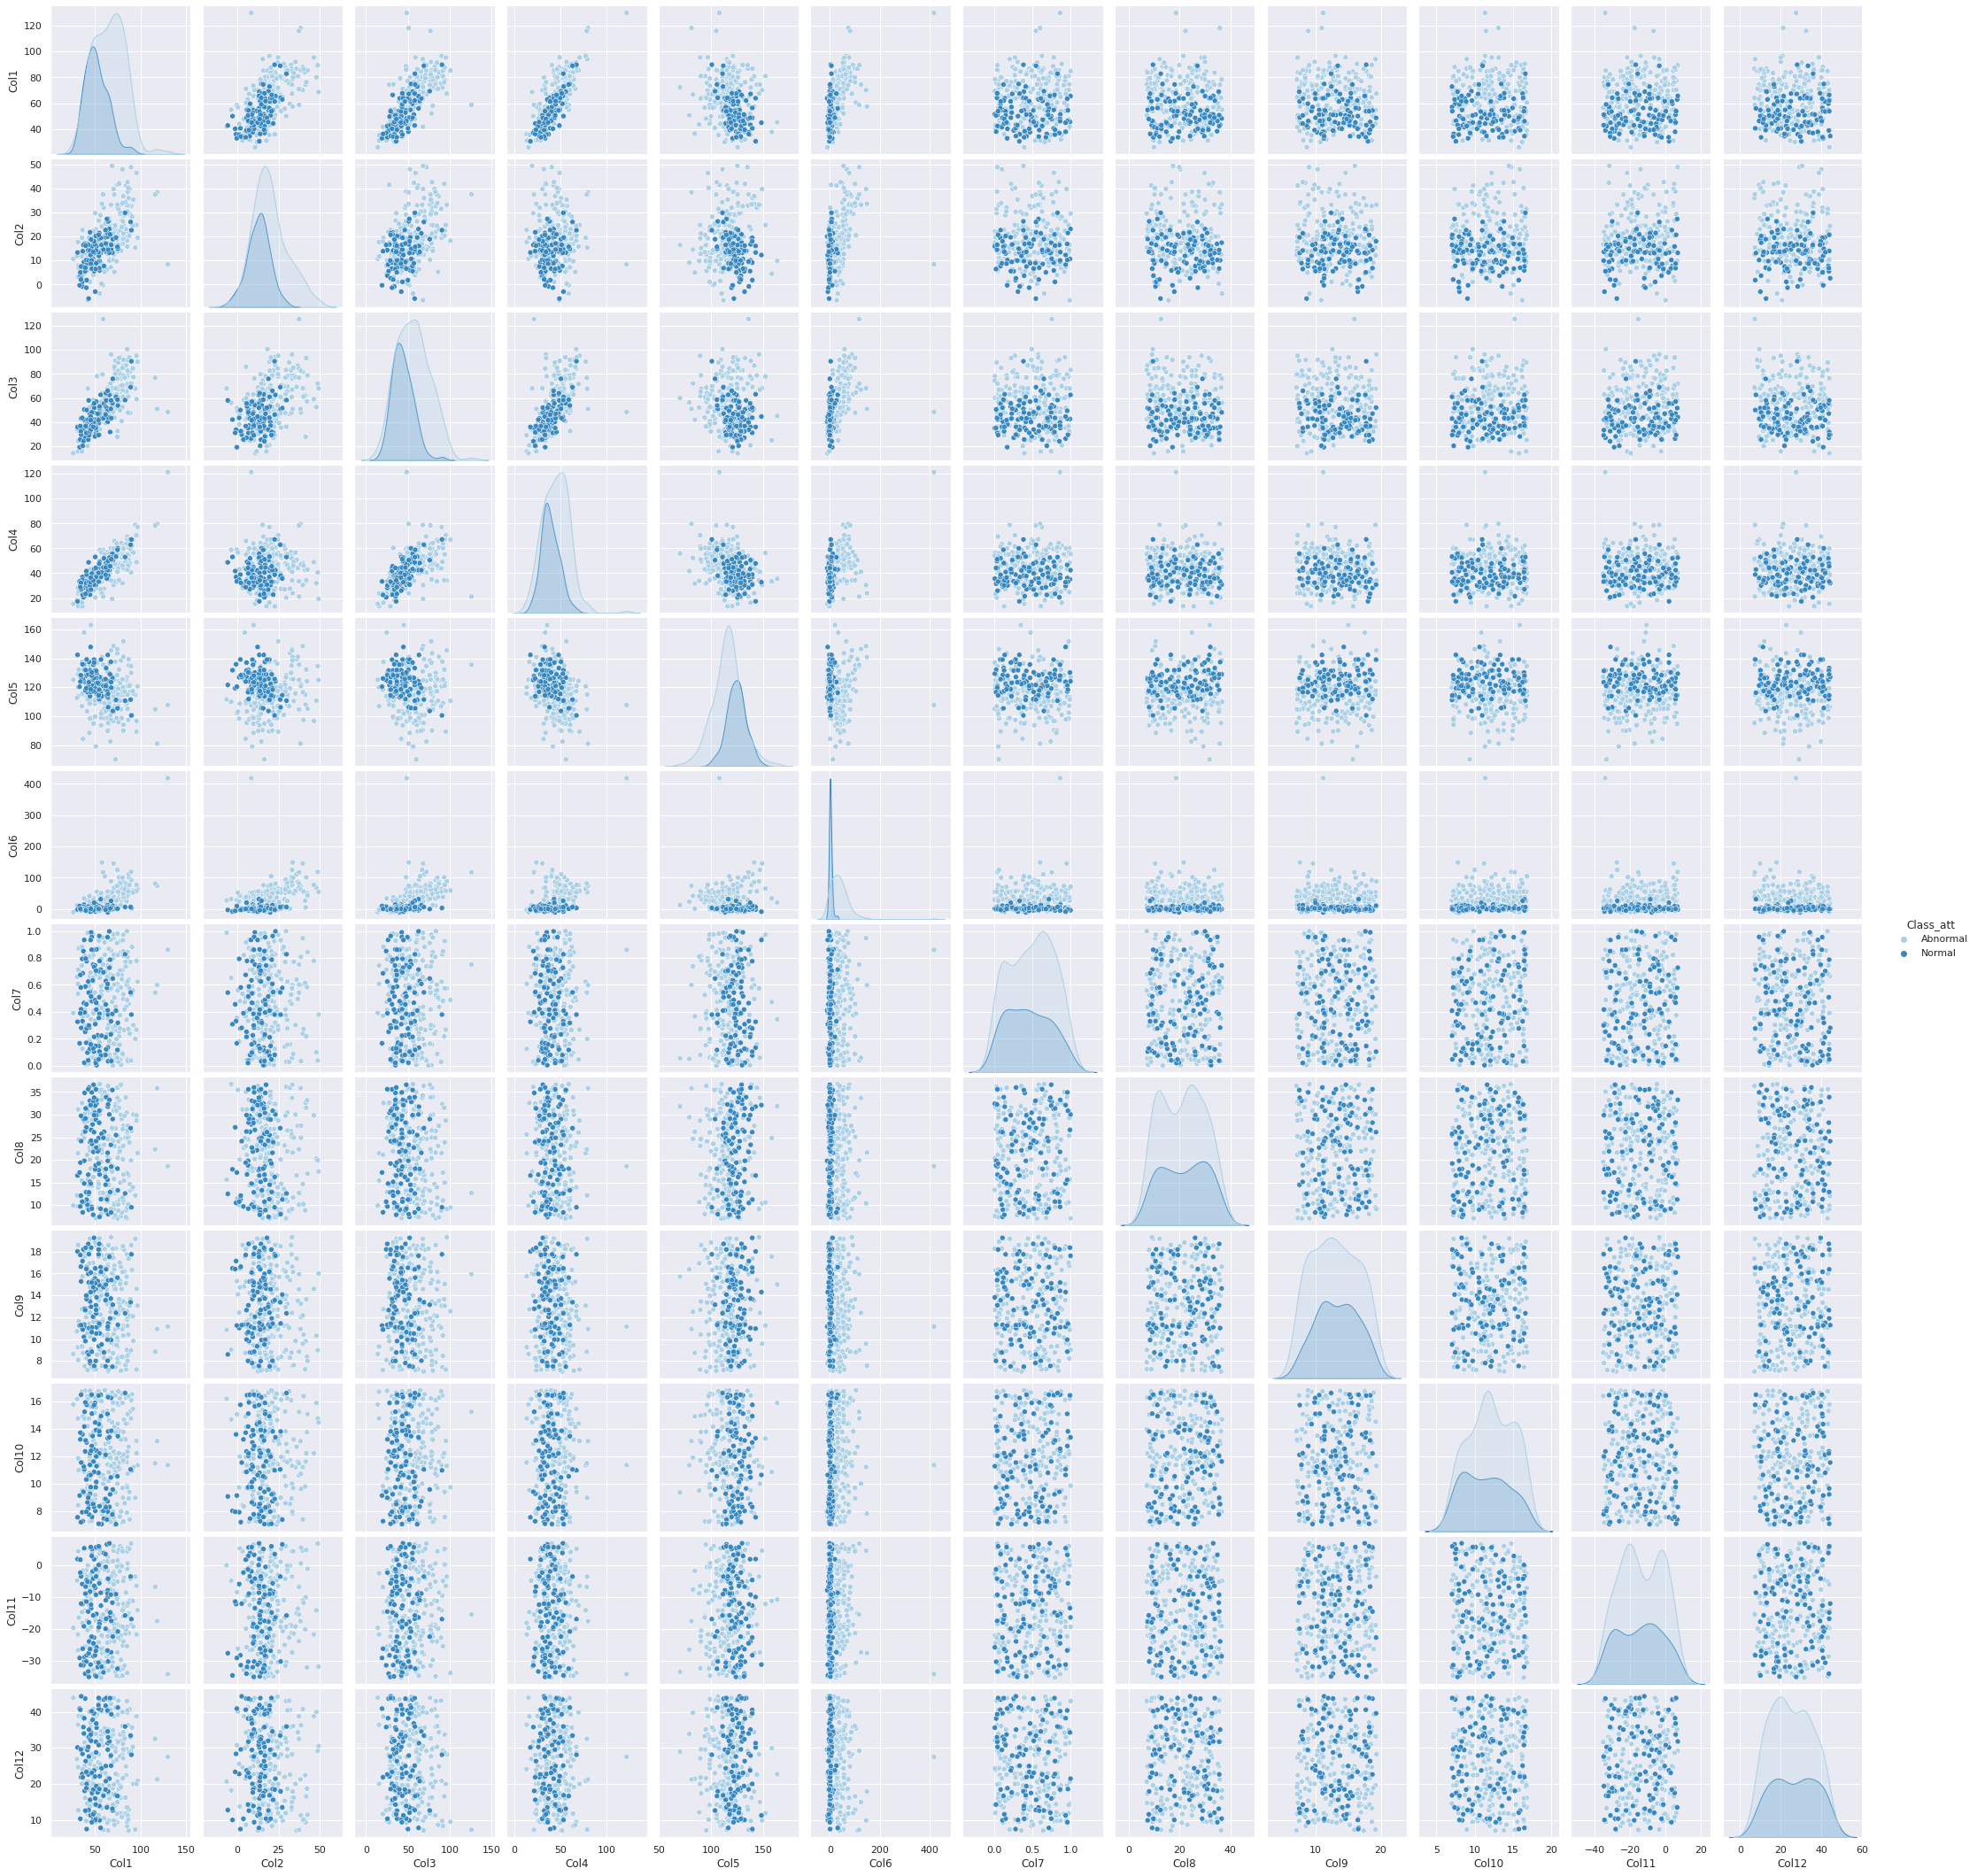

In [ ]:
sns.pairplot(df, hue='Class_att', palette='Blues')

Podemos observar que talvez pudessemos retirar algumas features com a intenção de melhorar o modelo. Isso porque variáveis podem ter alta correlação entre si (resultando em problemas de multicolinearidade), ou podem não ser explicativas o suficiente para a classificação. 

Uma alternativa é utilizar um algoritmo de feature selection, mas iremos dar foco ao melhoramento através de otimização de hiperparâmetros. 

#### 🔋Melhorando o modelo: fine tuning 

Existem inúmeros hiperparâmetros que podem ser ajustados em modelos, e encontrar a combinação ideal deles pode ser considerado um desafio de busca. Atualmente, há diversos algoritmos de otimização disponíveis para essa tarefa, mas uma técnica simples é a GridSearch! 

Para ajustar os hiperparâmetros no scikit-learn, pode-se utilizar o método GridSearchCV, que encontra de maneira eficiente os valores ideais dos hiperparâmetros dentre os fornecidos.

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(10, 30, 10),(20,), (100, 100, 100), (100,), (30, 40, 20), (50, 80, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive', 'invscaling'],
}

from sklearn.model_selection import GridSearchCV

- hidden_layer_sizes: define o número de camadas e o número de nós que desejamos ter no classificador de rede neural. Assim, o comprimento da tupla denota o número total de camadas ocultas na rede.
- activation: indica função de ativação para as camadas ocultas.
- solver: especifica o algoritmo para otimização de peso entre os nós.
- alpha: termo de regularização, ou termo de penalidade, que combate o overfitting restringindo o tamanho dos pesos
- learning_rate: taxa de aprendizado para atualizações de peso

In [ ]:
clf_tuned = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=5)
clf_tuned.fit(X, y)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,),
                                                (100, 100, 100), (100,),
                                                (30, 40, 20), (50, 80, 100)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

#### 🔎 Observando a melhor combinação de parâmetros encontrada

In [ ]:
print('Best parameters found:\n', clf_tuned.best_params_)

Best parameters found:
 {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 40, 20), 'learning_rate': 'invscaling', 'solver': 'lbfgs'}


In [ ]:
clf_tuned = MLPClassifier(hidden_layer_sizes=(100,), 
                            random_state = 21, 
                            activation='relu',
                            alpha=0.0001,
                            solver= 'sgd',
                            early_stopping=True,
                            learning_rate= 'constant')

#### 🏋️ Treinando...

In [ ]:
clf_tuned = clf_tuned.fit(X_train, y_train)

In [ ]:
y_pred_tuned = clf_tuned.predict(X_test)

#### 🤔 Analisando o Classification Report do modelo

In [ ]:
class_report = classification_report(y_test, y_pred_tuned)
print(class_report)

#### 🤔 Analisando a matriz de confusão do modelo

In [ ]:
cf_matrix_nb_tuned = confusion_matrix(y_test, y_pred_tuned)
print(cf_matrix_nb_tuned)

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_nb_tuned.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_nb_tuned.flatten() / np.sum(cf_matrix_nb_tuned)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 3)
sns.heatmap(cf_matrix_nb_tuned, annot=labels, fmt= '', cmap='Blues')